In [1]:
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import json
f = open("/home/sanket/projects/pakama/cb_research/data/input.json", "r")
js = json.load(f)
print(js["data"])
print(js["time"])

[0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.5, 1.0, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.0, 0.5, 0.5, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 0.5, 0.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0,

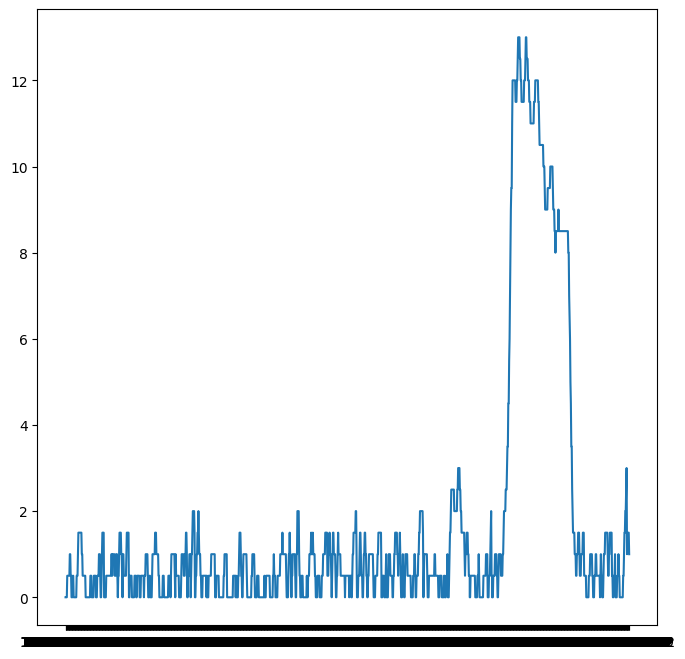

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(js['time'], js['data'], label='x')
plt.show()

In [3]:
import numpy as np
filter_kernel = np.ones(10) / 10
data = js["data"]
filtered_z = np.convolve(data,
                             filter_kernel,
                             'same')
print(filtered_z)

[0.05 0.1  0.15 ... 1.35 1.1  0.8 ]


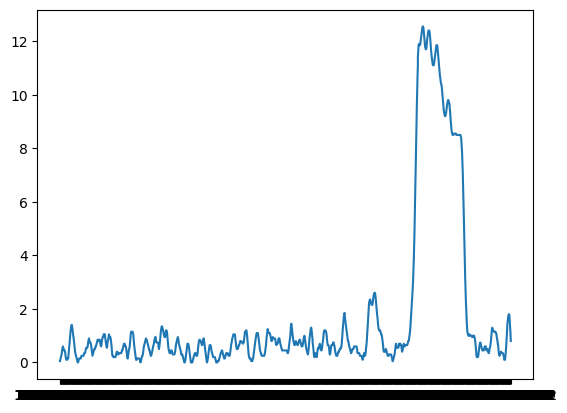

In [4]:
# plt.figure(figsize=(8, 8))
plt.plot(js['time'], filtered_z)
plt.show()

In [4]:
from scipy.signal import find_peaks
def identify_reps(force_data):
    upward_thresh = 12.0
    z_acc = force_data

    # We want to the start and end location of every consecutive sequence of measurement above our threshold

    # Note: scipy.signal.find_peaks would accomplish this, but feel magical. So we do out ourselves.

    segment_start_locations = []
    segment_end_locations = []
    segment_started = False
    for index, acc_value in enumerate(z_acc):
        if acc_value > upward_thresh:
            # if this is the first time we're encountering a high accelreation, write down that we identify a new segment start:
            if not segment_started:
                segment_start_locations.append(index)
            segment_started = True

        if acc_value < upward_thresh:
            # if we're already inside a segment and observed a low acceleration, mark that the segment has ended
            if segment_started:
                segment_end_locations.append(index)
            segment_started = False
    # handle edge case: if the recording ends with high accleeration, we end the last segment segment
    if segment_started:
        segment_end_locations.append(index)

    return (segment_start_locations, segment_end_locations)

# segment_starts, segment_ends = identify_reps(filtered_z)
t = js['time']
z = filtered_z
peaks2, t = find_peaks(z, prominence=1)      # BEST!
plt.figure(figsize=(8, 8))
plt.plot(t, peaks2, label='all')
# i = 0
# for start_loc,end_loc in zip(segment_starts, segment_ends):
#     plt.plot(t[start_loc:end_loc], z[start_loc:end_loc], label=str(i), marker='*')
#     i+=1
# plt.xlabel('time [sec]')
# plt.ylabel('acceleration [m/s^2]')
# plt.legend()
# plt.show()